# Textlength #

Hypothesis: “The meaning of a comment with less than 5 words are harder to understand, compared to longer comments”

Reason: “From the type-1, we can see that our model is confused in understanding the meaning of short sentences of less than five words. It is hard for our model to understand the context of short sentences, since these are few words that does not contain abusive words.“ (Detecting context abusiveness using hierarchical deep learning”, Lee et al. 2019)

#### Example ####

ID: 29
Label: False
Prediction: True
Confidence: 0.9638893
Comment: Die regierenden Politiker sind alle falsche Fuffziger...

ID: 409
Label: True
Prediction: False
Confidence: 0.789294
Comment: völlig Weltfremd sind die Verantwortlichen

ID: 607
Label: True
Prediction: False
Confidence: 0.6872356
Comment:Unser Problem ist eine Regierung ohne Rückgrat.

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [2]:
start = 0
stop = 100
step = 5
def all(c):
    return True
# the filter of the table
def lexical_diversity(text):
    return len(set(text)) / len(text)  * 100
def text_length(element):
    return len(element['text'])
def number_of_tokens(element):
    return len(element['tokens'])

def generate_filter(fr, to, function):
    def f(element):
        ld = function(element)
        if ld >= fr and ld < to:
            return True
        return False
    return f

def greater_then(el):
    return len(el['text'])>400


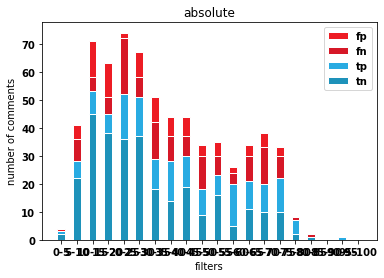

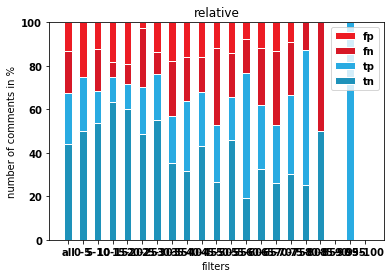

In [3]:
diagram_filters = []
diagram_filters.append(('all', all))
for i in range(start, stop, step):
    diagram_filters.append(('%s-%s' % (i, (i+step)),generate_filter(i, i+step, number_of_tokens)))
#diagram_filters.append(('400>', greater_then))

#name, filters, relative
create_plt(name = "absolute", filters = diagram_filters[1:], relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)

In [4]:
print('All')
show_metrics(calc_metrics(diagram_filters[0][1]))
print('0-5')
show_metrics(calc_metrics(diagram_filters[1][1]))
print('0-5')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[1][1])))

All


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


0-5


,label hate (1),label nohate (3)
pred hate (2),1,1
pred nohate (2),0,2


accuracy,precision,recall,f1_score
0.75,0.5,1.0,0.6666666666666666


0-5


,label hate (287),label nohate (383)
pred hate (244),157,87
pred nohate (426),130,296


accuracy,precision,recall,f1_score
0.6761194029850747,0.6434426229508197,0.5470383275261324,0.591337099811676
